## SVM = Support Vector Machines

Behold, the first truly **black box** classifier (note: SVM-s can also be used for regression). Don't bother with the weird name, it will make sense later.  
**Why are SVMs awesome?** Because it is a nonlinear classifier *while it is a linear classifier*. What? Yes! SVM-s do linear classification on the data **after it is transformed**.  
  
Let's look at the linear 2D case. There can be many solutions to the problem "Find the separating hyperplane", as seen in the picture below:
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/251px-Svm_separating_hyperplanes.png">  
However, they are obviously not equally good. $H_3$ doesn't separate the points according to the class, while $H_1$ and $H_2$ do. But if we look at $H_1$ and $H_2$, **we "feel" that $H_2$ is a better separator**, because there is less ambiguity in classifying the train points (look at the points closest to $H_1$ - they aren't far from being in the other class!).  
The points closest to the possible boundaries are called **support vectors**. **SVM-s try to maximize the margins around the separator**, only points close to the decision boundary affect optimality. The boundary would change if we remove one of the support vectors.  
  
Let's take a look at an example (plotting function is from <a href="http://blog.yhat.com/posts/why-support-vector-machine.html">here</a>):

In [117]:
import numpy as np
import matplotlib.pyplot as pl
from sklearn.datasets import make_circles
from sklearn import svm
from sklearn import linear_model
from sklearn import tree
import pandas as pd
%matplotlib inline

In [75]:
def plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr):
    x_min, x_max = df.x.min() - .5, df.x.max() + .5
    y_min, y_max = df.y.min() - .5, df.y.max() + .5

    # step between points. i.e. [0, 0.02, 0.04, ...]
    step = .02
    # to plot the boundary, we're going to create a matrix of every possible point
    # then label each point using our classifier
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # this gets our predictions back into a matrix
    Z = Z.reshape(xx.shape)

    # create a subplot (we're going to have more than 1 plot on a given image)
    pl.subplot(2, 2, plt_nmbr)
    # plot the boundaries
    pl.pcolormesh(xx, yy, Z, cmap=pl.cm.Paired)

    pl.scatter(xs, ys, c=cs)
    pl.title(clf_name)
    pl.figure(figsize=(15,15))

We generate 500 points, and classify them according to an imaginary circle:

In [124]:
xs = np.random.rand(500)*5
ys = np.random.rand(500)*5
cs = np.int0((xs-3)**2 + (ys-2)**2 > 3)

df = pd.DataFrame(data={'x': xs, 'y': ys, 'c': cs})
train_cols = ['x', 'y']

In [217]:
clfs = {
    "SVM": svm.SVC(),
    "Logistic" : linear_model.LogisticRegression(),
    "Tree": tree.DecisionTreeClassifier()
}

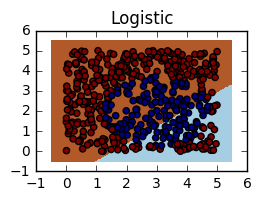

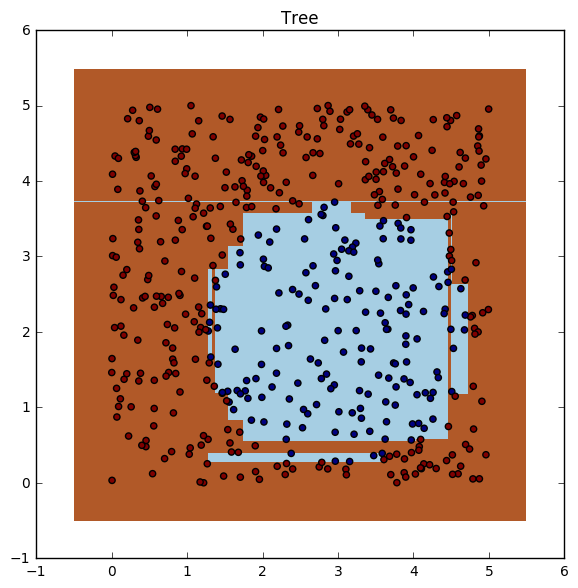

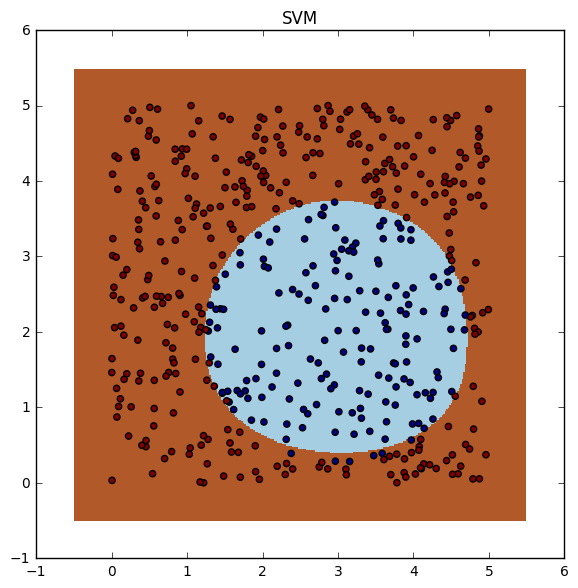

In [218]:
plt_nmbr = 1
for clf_name, clf in clfs.items():
    clf.fit(df[train_cols], df.c)
    plot_results_with_hyperplane(clf, clf_name, df, plt_nmbr)
    plt_nmbr += 1

### How the heck is this linear?

It is linear in the *transformed space*. If we introduce a third dimension, which we get like this:

In [231]:
zs = (xs-3)**2 + (ys-2)**2

Then our data points will look like this in the 3D space:

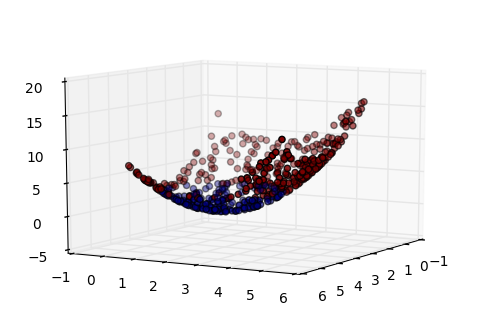

In [241]:
fig = pl.figure()
ax = fig.gca(projection='3d')
ax.scatter3D(xs, ys, zs, c=cs)
ax.view_init(10, 30)

Now we can see that the data points can be separated by a plane in this 3D space. Then projecting the intersection of the plane and the function $(x_1-3)^2 + (x_2-2)^2$ back to 2D, we get the classification boundary

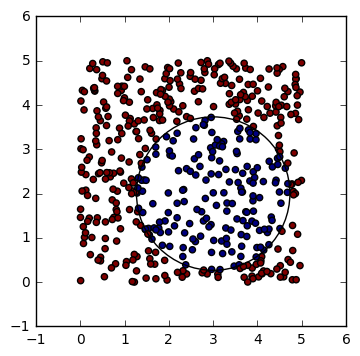

In [262]:
fig = pl.figure()
ax = fig.gca()
ax.scatter(xs, ys, c=cs)
ax.add_patch(pl.Circle((3,2), radius=np.sqrt(3), fill=False))
fig.set_figwidth(4)
fig.set_figheight(4)